In [1]:

import numpy as np
import pandas as pd
import collections


#Number of dataset to use
N = 10000

#How many keys to use
max_sel_keys = 20

In [21]:


df = pd.read_csv("reduce3.csv")

# get ingredients_text where Location = USA
df =  df.query("countries_en == 'United States'")

ing_list = collections.defaultdict(int)
total = df.shape[0]
N = min(total, N)



df = df[0:N]

print("dataset size",total)
print("used ",N)


for i in range (N):
    ingredients_text = df.iat[i,2]
    ing = ingredients_text.split(",")
    for j in range(len(ing)):
        ing[j] = ing[j].replace(".","").replace(")","").replace("(","").strip().lower()
       
    for ingredient in ing:
        ing_list[ingredient] += 1

print("key size", len(ing_list))
total_count = 0
for val in ing_list.values():
    total_count += val
print("total frequency count", total_count)

max_sel_keys = min(max_sel_keys, len(ing_list))
print(f"There are too many keys, we only use top {max_sel_keys} frequent keys to cluster")

count_dict = collections.defaultdict(list)
for key, val in ing_list.items():
    count_dict[val].append(key)

keys = list(count_dict.keys())
keys.sort(reverse=True)
sel_keywords = set()
selected_count = 0
key_fre = []
for i in range(min(max_sel_keys, len(keys))):
    print(f"count={keys[i]}, ingredients={count_dict[keys[i]]}")
    sel_keywords |= set(count_dict[keys[i]])
    selected_count += keys[i]
    for ingredient in count_dict[keys[i]]:
        key_fre.append([ingredient, keys[i]])

key_fre = pd.DataFrame(key_fre, columns=["ingredient", "frequency"])

print("total keys", len(keys))
print("selected key list", sel_keywords)
print("selected key frequency count", selected_count)
print(key_fre)
#add columns
for item in sel_keywords:
    df[item] = 0 #init with 0

for i in range (N):
    ingredients_text = df.iat[i,2]
    ing = ingredients_text.split(",")
    for j in range(len(ing)):
        ing[j] = ing[j].replace(".","").strip()
    for ingredient in ing:
        if ingredient in sel_keywords:
            df.at[i,ingredient] = 1

df = df[0:N]





dataset size 171460
used  10000
key size 14689
total frequency count 115725
There are too many keys, we only use top 20 frequent keys to cluster
count=6248, ingredients=['salt']
count=4280, ingredients=['sugar']
count=3728, ingredients=['water']
count=1974, ingredients=['citric acid']
count=1386, ingredients=['niacin']
count=1383, ingredients=['riboflavin']
count=1336, ingredients=['corn syrup']
count=1291, ingredients=['folic acid']
count=1233, ingredients=['natural flavor']
count=1074, ingredients=['thiamine mononitrate', 'high fructose corn syrup']
count=972, ingredients=['reduced iron']
count=846, ingredients=['dextrose']
count=809, ingredients=['soybean oil']
count=754, ingredients=['soy lecithin']
count=714, ingredients=['natural flavors']
count=696, ingredients=['spices']
count=674, ingredients=['modified corn starch']
count=659, ingredients=['maltodextrin']
count=653, ingredients=['cocoa butter']
count=646, ingredients=['enzymes']
total keys 226
selected key list {'sugar', 'enz

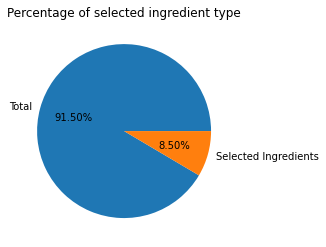

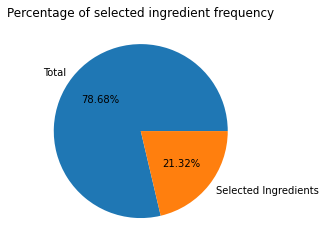

In [28]:
import matplotlib.pyplot as plt
 
name_list = ['Total','Selected Ingredients']
num_list = [len(keys), len(sel_keywords)]
plt.pie(num_list,labels=name_list,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Percentage of selected ingredient type")
plt.show()

name_list = ['Total','Selected Ingredients']
num_list = [total_count, selected_count ]
plt.pie(num_list,labels=name_list,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Percentage of selected ingredient frequency")
plt.show()

# name_list = ['Total','Selected Ingredients']
# num_list = [total_count, selected_count ]
# plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
# plt.ylabel("Frequency")
# plt.show()

In [23]:
print("save the high dimensional data to highDdata.csv")

# import os
# os.remove("highDdata.csv")

df.to_csv("highDdata.csv", index = False)

save the high dimensional data to highDdata.csv


In [24]:
print("save the frequency data to frequency.csv")
key_fre.to_csv("frequency.csv")

save the frequency data to frequency.csv
